In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

In [2]:
# state transition matrices for linear system: 
#     x(t+1) = A x (t) + B u(t)
A = np.array([[1,1],[0,1]])
B = np.array([[0],[1]])

# LQR quadratic cost per state
Q = np.array([[1,0],[0,0]])

# initial condition for system
z0 = -1 # initial position
v0 = 0  # initial velocity
x0 = np.vstack((z0,v0))

# number of time steps to simulate
T = 30

In [3]:
def lqr(A,B,Q,R):
    # Solves for the optimal infinite-horizon LQR gain matrix given linear system (A,B) 
    # and cost function parameterized by (Q,R)
    
    # solve DARE:
    M=scipy.linalg.solve_discrete_are(A,B,Q,R)

    # K=(B'MB + R)^(-1)*(B'MA)
    return np.dot(scipy.linalg.inv(np.dot(np.dot(B.T,M),B)+R),(np.dot(np.dot(B.T,M),A)))

In [4]:
def simulate_static_gain(A,B,K,x0,T):
    # simulates the linear system (A,B) with static control law
    # u(t) = K x(t)
    # from initial condition x0 for T time steps
    #
    # returns matrices u and x of control and state trajectories, respectively.
    # dim 1 of these matrices is indexed by time.
    x = x0
    u = [[0]]
    for t in range(T-1):
        u_t = -K.dot(x[:,-1])
        x_tp1 = A.dot(x[:,-1])+B.dot(u_t)
        x = np.hstack((x, x_tp1[:,None]))
        u = np.hstack((u,u_t[:,None]))
    return x,u

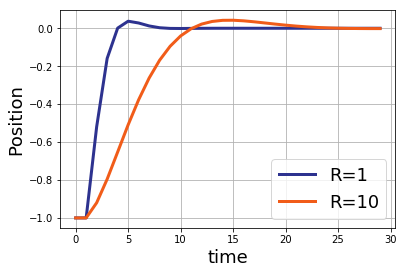

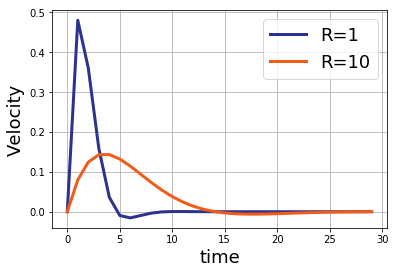

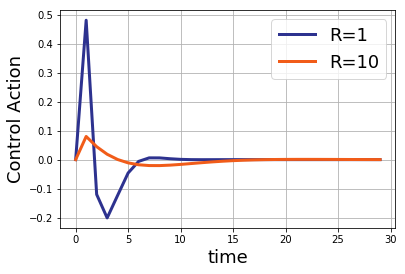

In [8]:
K_lo = lqr(A,B,Q,1)
(x_lo,u_lo) = simulate_static_gain(A,B,K_lo,x0,T)

K_hi = lqr(A,B,Q,100)
(x_hi,u_hi) = simulate_static_gain(A,B,K_hi,x0,T)

def plot_trajectories(x1,x2,ylabel,leg_loc='lower right'):
    colors = [ '#2D328F', '#F15C19' ]
    label_fontsize = 18
    linewidth = 3

    T = x1.shape[0]
    t = np.arange(0,T)
    plt.plot(t,x1,color=colors[0],linewidth=linewidth,label='R=1')
    plt.plot(t,x2,color=colors[1],linewidth=linewidth,label='R=10')
    
    plt.xlabel('time',fontsize=label_fontsize)
    plt.ylabel(ylabel,fontsize=label_fontsize)
    plt.legend(loc=leg_loc,fontsize=label_fontsize)
    plt.grid(True)
    plt.show()

plot_trajectories(x_lo[0,:],x_hi[0,:],'Position','lower right')
plot_trajectories(x_lo[1,:],x_hi[1,:],'Velocity','upper right')
plot_trajectories(u_lo.T,u_hi.T,'Control Action','upper right')